<a href="https://colab.research.google.com/github/SheidaTalei/FinalProject/blob/main/SheidaTalei_KMeanVsBERT_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUBJECT: K-Mean Vs BERT Embedding

###AUTHOR: Sheida Talei

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Mounted at /content/drive


In [ ]:
import transformers
from transformers import BertModel, BertTokenizer
import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report





In [ ]:
!pip install --target=$nb_path transformers

In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer
#Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# from transformers import TFBertModel, TFBertPreTrainedModel, TFBertForSequenceClassification
# from transformers import glue_convert_examples_to_features, InputExample
# from sentence_transformers import SentenceTransformer

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from kneed import KneeLocator
from sklearn import metrics

In [ ]:
!pip install --target=$nb_path kneed

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
!pip install --target=$nb_path sentence_transformers

In [ ]:
# !pip install --target=$nb_path transformers

In [ ]:
pip install -U sentence-transformers

     |████████████████████████████████| 71kB 6.1MB/s 
     |████████████████████████████████| 1.8MB 12.0MB/s 
     |████████████████████████████████| 1.2MB 50.9MB/s 
     |████████████████████████████████| 3.2MB 55.1MB/s 
     |████████████████████████████████| 890kB 50.9MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.4.1.2-cp37-none-any.whl size=103068 sha256=fca4250514e294611d50cb1b22bf98ca1543cd4ab6fe542a7b580319095a36ee
  Stored in directory: /root/.cache/pip/wheels/3d/33/d1/5703dd56199c09d4a1b41e0c07fb4e7765a84d787cbdc48ac3
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=771a194c5d3b360874908f9c8e553b0352ed47c1c18e449ae300c3ab02e54cea
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
from hazm import *

In [ ]:

from wordcloud_fa import WordCloudFa

In [ ]:
!pip install --target=$nb_path hazm

In [ ]:
# from flair.embeddings import BertEmbeddings

In [ ]:
# from nltk import tokenize

# import nltk
# nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#------------------------------------------Empty Rows Removal----------------------------------------------------------------
# This function Will: 1- Remove all empty rows from csv file 2- Save data to the same csv
def removeEmptyRows(fileName):
    df = pd.read_csv(fileName, encoding='utf-8-sig')
    df = df.dropna(subset=['text'], how='all', axis=0) 
    df.to_csv(fileName, header=True, encoding='utf-8-sig',  index=False)
    
    return df

In [ ]:
def tokenization (X):
    tokenized_train_data = []
    for item in range(len(X)):
        var = word_tokenize(X[item])
#         var.append(Y[item])
        tokenized_train_data.append(var)
        
    return tokenized_train_data    

In [ ]:
X_and_Y = removeEmptyRows ('/content/drive/MyDrive/Final/train_temp.csv')
# X_and_Y = removeEmptyRows ('/content/drive/MyDrive/Final/WightedTweets.csv')
Y_train= X_and_Y.Label
X_train = X_and_Y.text
# X_train = X_and_Y.tweet
# Y_train =  X_and_Y.Weight

In [ ]:
list_x_and_y = tokenization (X_train) 

In [ ]:
# def preprocessing_for_bert(data):
#   input_ids = []
#   attention_masks = []
#   for row in data:
#     sents = tokenize.sent_tokenize(row)
#     print(sents)
#     for sent in sents:
#       encoded_sent = tokenizer.encode_plus(text=sent,
#                                           add_special_tokens=True,
#                                           max_length=MAX_LEN,
#                                           pad_to_max_length=True,
#                                           return_attention_mask=True,
#                                           truncation=True)
#       input_ids.append(encoded_sent.get('input_ids'))
#       attention_masks.append(encoded_sent.get('attention_mask'))
#   # Convert lists to tensors
#   input_ids = torch.tensor(input_ids)
#   attention_masks = torch.tensor(attention_masks)

#   return input_ids, attention_masks


# tokens_tensor, segments_tensor = preprocessing_for_bert(X_train)

In [ ]:
#Loading the model

# import os
# checkpoint_path = "/content/drive/MyDrive/Final/Bert1.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels = 2, output_hidden_states = True)
# # model = model = BertModel.from_pretrained('bert-base-multilingual-cased', output_hidden_states = True)
# optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08, clipnorm=1.0)
# loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# metric_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')



In [ ]:
##DONT REMOVE

# model.compile(optimizer=optimizer, loss=loss, metrics=[ metric_accuracy])
# latest = tf.train.latest_checkpoint(checkpoint_dir)
# model.load_weights(latest)
# model.load_weights(checkpoint_path)


In [ ]:



model = SentenceTransformer('bert-base-multilingual-cased')
# model = SentenceTransformer('distiluse-base-multilingual-cased-v2')


Exception when trying to download https://sbert.net/models/bert-base-multilingual-cased.zip. Response 404
SentenceTransformer-Model https://sbert.net/models/bert-base-multilingual-cased.zip not found. Try to create it from scratch
Try to create Transformer Model bert-base-multilingual-cased with mean pooling


In [ ]:
#Source: https://github.com/UKPLab/sentence-transformers
sentence_embeddings = model.encode(X_train)

In [ ]:
# num_cluster = 4
# kmean=KMeans(n_clusters=num_cluster)
# kmean.fit(sentence_embeddings)
# labels = kmean.labels_
# silhoute = metrics.silhouette_score(sentence_embeddings, labels, metric='euclidean')
# print("silhouette_score is: ",silhoute)

silhouette_score is:  0.04300587


In [ ]:
# centroids = kmean.cluster_centers_

# Confusion Matrix

In [ ]:
#this functon calculates cos theta between two vectors
def similarity (vector_a, vector_b):
  ma = np.linalg.norm(vector_a)
  mb = np.linalg.norm(vector_b)
  sim = (np.matmul(vector_a,vector_b))/(ma * mb)
  return sim

In [ ]:
centroid_matrix = np.zeros((num_cluster,num_cluster))

In [ ]:
for i in range(num_cluster):
  for j in range(num_cluster):
    centroid_matrix[i][j] = similarity(centroids[i], centroids[j])

In [ ]:
print(centroid_matrix)

[[1.         0.91038895 0.90214056 0.89592206]
 [0.91038895 0.99999988 0.92355311 0.94489884]
 [0.90214056 0.92355311 0.99999988 0.93418097]
 [0.89592206 0.94489884 0.93418097 0.99999988]]


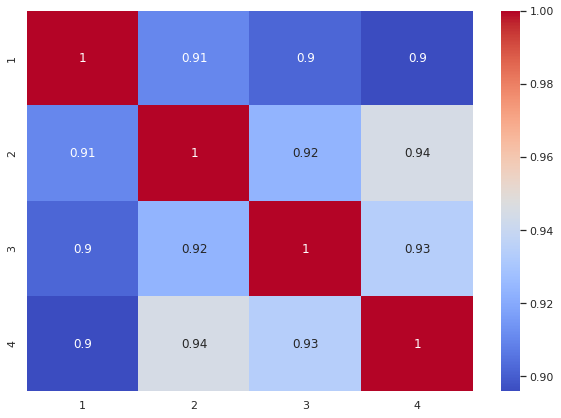

In [ ]:
#Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(centroid_matrix, range(1,num_cluster+1), range(1,num_cluster+1))
plt.figure(figsize = (10,7))
# sn.color_palette("vlag", as_cmap=True)
plot = sn.heatmap(df_cm, annot=True, cmap="coolwarm")
plot.figure.savefig("/content/drive/MyDrive/Final/BERT_4.png")

In [ ]:
SSE = []
SIL = []

clusterList = [22, 70, 100,150,200,250,300,350,400,500,700,1000]
for cluster in clusterList:
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(sentence_embeddings,sample_weight=Y_train) #,sample_weight=Y
    SSE.append(kmeans.inertia_)
    labels = kmeans.labels_
    SIL.append(metrics.silhouette_score(sentence_embeddings, labels, metric='euclidean'))
    # clusterList.append(cluster)
    print (cluster)


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


22


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


70


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


100


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


150


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


200


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


250


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


300


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


350


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


400


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


500


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


700


/content/notebooks/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


1000


Text(0, 0.5, 'silhouette_score')

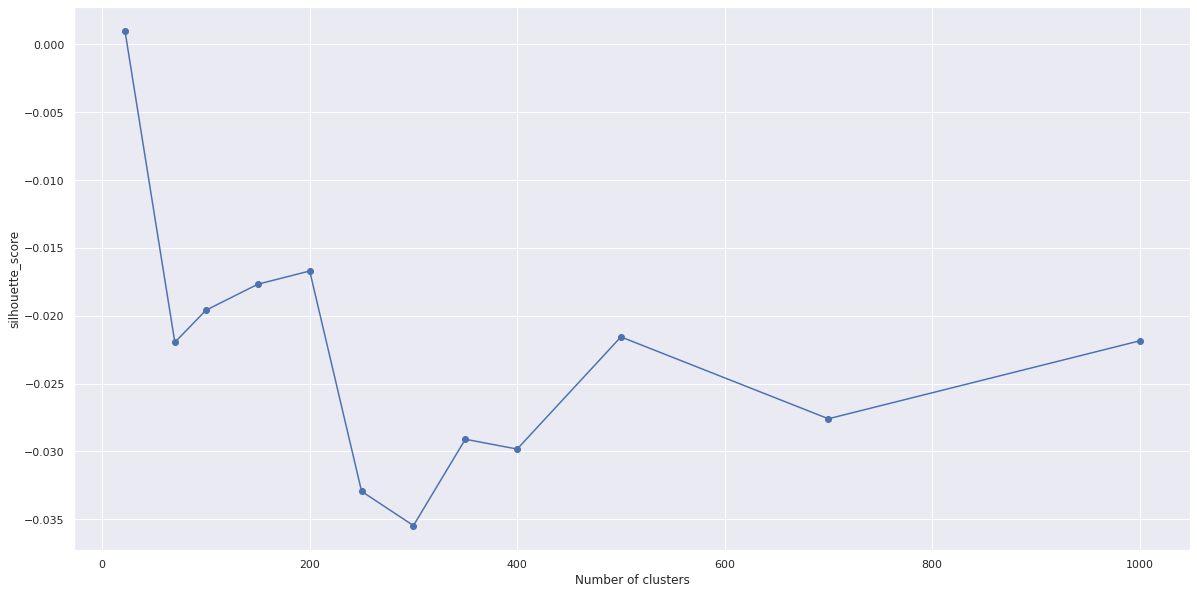

In [ ]:
frame = pd.DataFrame({'Cluster':clusterList, 'SIL':SIL})
plt.figure(figsize=(20,10))
plt.plot(frame['Cluster'], frame['SIL'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')

Text(0, 0.5, 'Inertia')

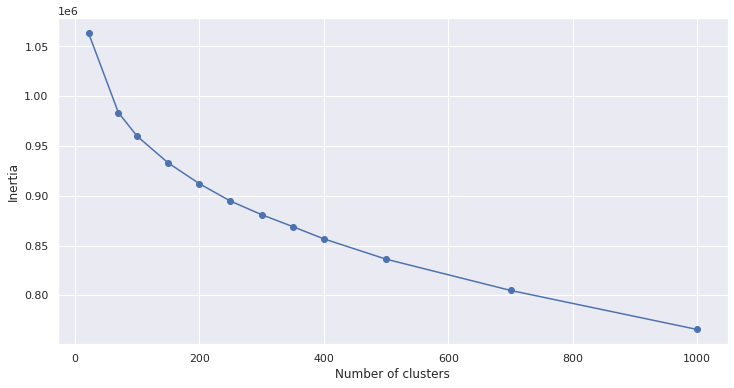

In [ ]:
frame = pd.DataFrame({'Cluster':clusterList, 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
kl = KneeLocator(clusterList, SSE, curve="convex", direction="decreasing")
true_k = kl.elbow
print (true_k)



250


In [ ]:
true_k=250
kmean=KMeans(n_clusters=true_k)
kmean.fit(sentence_embeddings) #, sample_weight = Y_train

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=250, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print(metrics.silhouette_score(sentence_embeddings, labels, metric='euclidean'))

-0.02185438


In [ ]:
cluster_assignment = kmean.labels_


##word cloud

In [ ]:
#source: https://www.datacamp.com/community/tutorials/wordcloud-python
#https://pypi.org/project/wordcloud-fa/
def draw_cloudWord(text, fileName): #, frequencies

  wordcloud = WordCloudFa(no_reshape=False,  include_numbers=False, collocations=False, width=800, height=400,background_color="white")
  wc = wordcloud.generate(text)
  # frequencies = wordcloud.process_text(text)
  # wc = wordcloud.generate_from_frequencies(frequencies)
  image = wc.to_image()
  image.show()
  image.save('/content/drive/MyDrive/Final/cloudFolderBERT_250_1/'+fileName +".png")



In [ ]:
def writeToFile(word, weight,  fileName, lastFileName):
    X_and_Y = pd.read_csv(fileName , encoding="utf-8")
    text = ''
    counter = 0
    for item in input_list:
        for i in range(len(item)):
            text += list(item)[i] + ' '
        print(counter)    
        X_and_Y.loc [counter, 'text'] = text.strip()
        X_and_Y.to_csv(lastFileName ,index=False, encoding='utf-8-sig')
        counter = counter + 1
        text =''

In [ ]:
# features = vectorizer.get_feature_names()
file = pd.read_csv("/content/drive/MyDrive/Final/BERT_250.csv" , encoding="utf-8")
file1 = pd.read_csv("/content/drive/MyDrive/Final/tweets_cluster_250_BERT.csv" , encoding="utf-8")
counter = 0
counter1 = 0
content = ""

#each row == each tweet
distances = kmean.transform(X=sentence_embeddings)
print(distances.shape)
centroids = kmean.cluster_centers_
text = ""
# weights = np.abs(centroids)
for i in range(kmean.n_clusters):
  print("Cluster %d:" % i)
  file.loc [counter, 'Cluster'] = "Cluster %d:" % i
  file1.loc [counter1, 'Cluster'] = "Cluster %d:" % i
  top5 = np.argsort(distances[:, i])[0:49] 

  for j in top5:
    print(j)
    index = list_x_and_y[j]
    
    

    for word in range(len(index)):
      
      text +=index[word].strip() +" "
      content  +=index[word].strip() +" "
 
      print("Word: "+ index[word] + " distance: "+ str(distances[j][i] ))
      counter = counter + 1
      file.loc [counter, 'Word'] = index[word]
      file.loc [counter, 'Weight'] = distances[j][i]
    
    
    text =  text.replace("gt", "")
    counter1 = counter1 +1
    file1.loc [counter1, 'tweet'] = content
    file1.to_csv("/content/drive/MyDrive/Final/tweets_cluster_250_BERT.csv" ,index=False, encoding='utf-8-sig')
    print(text)
    content = ""
  draw_cloudWord(text, "cloud_tfidf_"+str(i)) #,Y[i]
  file.to_csv("/content/drive/MyDrive/Final/BERT_250.csv" ,index=False, encoding='utf-8-sig')
  text = ""

Streaming output truncated to the last 5000 lines.
Word: تمدید distance: 2.7668083
Word: توجه distance: 2.7668083
Word: ترند distance: 2.7668083
Word: شد#شو distance: 2.7668083
Word: حجم distance: 2.7668083
Word: نباید distance: 2.7668083
Word: تو distance: 2.7668083
درخواست گرفت#گیر قرار تمدید توجه ترند شد#شو حجم نباید تو درخواست گرفت#گیر قرار تمدید توجه ترند شد#شو حجم نباید تو درخواست گرفت#گیر قرار تمدید توجه ترند شد#شو حجم نباید تو درخواست گرفت#گیر قرار تمدید توجه ترند شد#شو حجم نباید تو درخواست گرفت#گیر قرار تمدید توجه ترند شد#شو حجم نباید تو درخواست گرفت#گیر قرار تمدید توجه ترند شد#شو حجم نباید تو درخواست گرفت#گیر قرار تمدید توجه ترند شد#شو حجم نباید تو درخواست گرفت#گیر قرار تمدید توجه ترند شد#شو حجم نباید تو درخواست گرفت#گیر قرار تمدید توجه ترند شد#شو حجم نباید تو درخواست گرفت#گیر قرار تمدید توجه ترند شد#شو حجم نباید تو درخواست گرفت#گیر قرار تمدید توجه ترند شد#شو حجم نباید تو درخواست گرفت#گیر قرار تمدید توجه ترند شد#شو حجم نباید تو 
28959
Word: درخواست distance: 2.7668083
Word: گ

In [ ]:
#https://theaidigest.in/how-to-cluster-text-documents-using-bert/
clustered_sentences = [[] for i in range(true_k)]
counter = 0
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if(len(clustered_sentences[cluster_id])<=10):
      clustered_sentences[cluster_id].append(X_train[sentence_id])


In [ ]:

for i, cluster in enumerate(clustered_sentences):
      print("Cluster ", i+1)
      print(cluster)
      print("")
      

Cluster  1
['دل اینکه هواتو منتظر همیشه مطمئن خوبی خوش تو وصله سختی جا', 'پای سفره ای زدن سر مردی بزرگ شد#شو فتاده شرم تو', 'میگرفت نمیومد تو محمود محرم صدا دهه خیلیا حاج مراسم', 'امریکا شه فردا نخواهیم کرد دلار خون تومن تهران باز کسا بره رحم پاک ابد بیاد بمونه کشتین فراموش سفارت نمیشه ترامپ دستاتون بایدن', 'بچه چندش ترین من قشنگ همینه حیوون', 'ایران نالایقه دختر به میداد خیلی بگیم نفر خدا میخوایم وقت نباید میگ', 'باز الانم بچرخم منشنت ول شب بیکاری همینجا زن بیام میکنم', 'موج خیلیا سوار بشن دایی', 'الهی😂😂 اخه میکنی بچه گیج', 'حجاب بیبی فاطمه کیر تو', 'نمی دونم اعتماده بچه ها']

Cluster  2
['جاری مسلمین توانست#توان داد#ده انقلاب مهدی اولیا نیز ادامه ان ولیعصر ای اله خامنه امام پذیرفت#پذیر قاسم قسم میباشد حضرت تاکید شاالله ولایت خداوند عزیز خورده اند حاج قبولی', 'روز عصر خاص اغاز اصل مشهد خواهد شد بهداشت الاول امامت شرایط الشریف نهم فرجه برگزار عجل دوشنبه اپیدمی مراسم ربیع حضرت کشور الله توجه برگزاری کرونا پروتکل مقدور تعالی مقدس امکان رعایت شهر', 'القیامه دعا زهرا🍃🌸🌹🌹🌹🌹 سالمکم حرب 🌹🌹🌹🍃🌸

In [ ]:
silhouette_score = metrics.silhouette_score(sentence_embeddings, cluster_assignment, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.013678591


In [ ]:
#https://www.w3resource.com/python-exercises/list/python-data-type-list-exercise-30.php
import collections

In [ ]:
my_list = kmean.predict(X=sentence_embeddings)
ctr = collections.Counter(my_list)

In [ ]:
dict(sorted(ctr.items(), key=lambda item: item[0]))

{0: 245,
 1: 495,
 2: 236,
 3: 364,
 4: 204,
 5: 373,
 6: 286,
 7: 84,
 8: 45,
 9: 68,
 10: 138,
 11: 330,
 12: 134,
 13: 283,
 14: 33,
 15: 94,
 16: 199,
 17: 189,
 18: 93,
 19: 36,
 20: 174,
 21: 271,
 22: 260,
 23: 244,
 24: 116,
 25: 200,
 26: 80,
 27: 147,
 28: 297,
 29: 348,
 30: 331,
 31: 25,
 32: 141,
 33: 217,
 34: 261,
 35: 289,
 36: 71,
 37: 290,
 38: 26,
 39: 70,
 40: 319,
 41: 71,
 42: 74,
 43: 53,
 44: 168,
 45: 267,
 46: 137,
 47: 203,
 48: 42,
 49: 20,
 50: 126,
 51: 100,
 52: 74,
 53: 158,
 54: 240,
 55: 131,
 56: 375,
 57: 214,
 58: 132,
 59: 97,
 60: 163,
 61: 33,
 62: 129,
 63: 218,
 64: 229,
 65: 248,
 66: 98,
 67: 145,
 68: 255,
 69: 67,
 70: 263,
 71: 31,
 72: 335,
 73: 426,
 74: 182,
 75: 121,
 76: 185,
 77: 40,
 78: 343,
 79: 92,
 80: 97,
 81: 328,
 82: 173,
 83: 214,
 84: 125,
 85: 116,
 86: 94,
 87: 353,
 88: 79,
 89: 29,
 90: 321,
 91: 82,
 92: 34,
 93: 137,
 94: 499,
 95: 209,
 96: 193,
 97: 168,
 98: 94,
 99: 35,
 100: 167,
 101: 237,
 102: 331,
 103: 306,

In [ ]:
print(ctr)

Counter({94: 499, 1: 495, 73: 426, 166: 414, 109: 398, 124: 398, 179: 391, 118: 389, 56: 375, 5: 373, 3: 364, 189: 363, 122: 362, 87: 353, 29: 348, 171: 346, 131: 344, 78: 343, 240: 339, 72: 335, 30: 331, 102: 331, 11: 330, 81: 328, 194: 327, 176: 323, 186: 322, 90: 321, 40: 319, 139: 318, 208: 317, 154: 314, 145: 311, 199: 311, 103: 306, 106: 304, 155: 300, 28: 297, 236: 292, 156: 292, 134: 292, 151: 290, 37: 290, 200: 290, 35: 289, 130: 288, 6: 286, 13: 283, 221: 281, 214: 279, 117: 278, 215: 278, 148: 277, 209: 273, 21: 271, 45: 267, 70: 263, 34: 261, 22: 260, 153: 259, 188: 256, 68: 255, 112: 249, 104: 249, 219: 248, 65: 248, 0: 245, 181: 244, 23: 244, 157: 243, 54: 240, 223: 239, 225: 238, 101: 237, 127: 237, 2: 236, 133: 234, 177: 232, 129: 232, 238: 229, 64: 229, 138: 229, 152: 225, 147: 224, 150: 223, 228: 221, 163: 218, 63: 218, 33: 217, 187: 215, 57: 214, 83: 214, 216: 210, 229: 209, 95: 209, 4: 204, 47: 203, 146: 203, 206: 203, 212: 202, 25: 200, 16: 199, 182: 198, 142: 198,

In [ ]:
for i in range(len(ctr)):
  print (i ,ctr[i] )

0 245
1 495
2 236
3 364
4 204
5 373
6 286
7 84
8 45
9 68
10 138
11 330
12 134
13 283
14 33
15 94
16 199
17 189
18 93
19 36
20 174
21 271
22 260
23 244
24 116
25 200
26 80
27 147
28 297
29 348
30 331
31 25
32 141
33 217
34 261
35 289
36 71
37 290
38 26
39 70
40 319
41 71
42 74
43 53
44 168
45 267
46 137
47 203
48 42
49 20
50 126
51 100
52 74
53 158
54 240
55 131
56 375
57 214
58 132
59 97
60 163
61 33
62 129
63 218
64 229
65 248
66 98
67 145
68 255
69 67
70 263
71 31
72 335
73 426
74 182
75 121
76 185
77 40
78 343
79 92
80 97
81 328
82 173
83 214
84 125
85 116
86 94
87 353
88 79
89 29
90 321
91 82
92 34
93 137
94 499
95 209
96 193
97 168
98 94
99 35
100 167
101 237
102 331
103 306
104 249
105 170
106 304
107 16
108 40
109 398
110 25
111 57
112 249
113 140
114 49
115 67
116 20
117 278
118 389
119 138
120 9
121 17
122 362
123 59
124 398
125 151
126 86
127 237
128 175
129 232
130 288
131 344
132 32
133 234
134 292
135 34
136 34
137 138
138 229
139 318
140 167
141 21
142 198
143 11
144 173
